In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer

In [47]:
# Loading SMS dataset
sms_data = pd.read_csv("spam.csv", encoding='latin-1')
sms_data = sms_data[['v1', 'v2']]  # Select only relevant columns

# Displaying first few rows of the dataset
print(sms_data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
sms_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [4]:
sms_data.duplicated('v2').sum()

403

In [35]:
sms_data.drop_duplicates(subset='v2', keep='first', inplace=True)
print(sms_data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [36]:
sms_data.shape

(5169, 2)

In [37]:
# Convert labels to binary (spam: 1, ham: 0)
sms_data['v1'] = sms_data['v1'].map({'spam': 1, 'ham': 0})

In [38]:
sms_data.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [48]:
# Text cleaning function
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin the tokens into a cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [49]:
# Apply text cleaning to the 'v2' column
sms_data['cleaned_text'] = sms_data['v2'].apply(clean_text)

In [51]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(sms_data['cleaned_text'])
print(sms_data[['v2', 'cleaned_text']].head())

                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [53]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, sms_data['v1'], test_size=0.2, random_state=42)

In [55]:
# Display the distribution of target classes after cleaning
print(sms_data['v1'].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


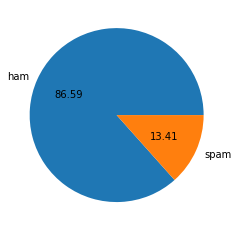

In [57]:
plt.pie(sms_data['v1'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [58]:
# Train the Naive Bayes classifier
model = MultinomialNB()

In [59]:
#  Train the model
model.fit(X_train, y_train)

MultinomialNB()

In [64]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Check Accuracy

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9668161434977578


In [63]:
# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
[[965   0]
 [ 37 113]]


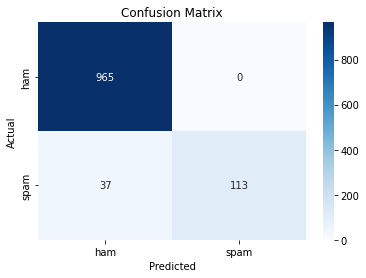

In [65]:
# Assuming conf_matrix is your confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()